In [20]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

import keras
import keras.utils.vis_utils
from keras import backend as K
from keras import layers
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model


In [21]:

####################################################################################################
####################################################################################################

folder   = "models" + "/"    
name     = "model_xenon1t_elu"
name_h5  = folder + name + ".h5"
name_png = folder + name + ".png"



In [22]:

####################################################################################################
####################################################################################################

model = load_model(name_h5)


In [23]:

####################################################################################################
####################################################################################################

file_all = "../pax_waveform_simulator/merged/merged_all.pkl"

df_all   = pd.read_pickle(file_all)
df_all   = df_all[df_all['s2_exists'] == True]


####################################################################################################
####################################################################################################

#df_train_truth = pd.DataFrame.from_csv("../python_pax_reader/data/train_truth_v2.csv")
#df_train_input = pd.DataFrame.from_csv("../python_pax_reader/data/train_input_v2.csv")


####################################################################################################
####################################################################################################

df_train_truth = df_all[:][['x', 'y']]
df_train_input = df_all.iloc[:, 14:]



In [24]:

####################################################################################################
# First 127 are S2
####################################################################################################

df_train_input = df_train_input.iloc[:, 0:127]
df_train_input.shape



(24858, 127)

In [25]:

####################################################################################################
####################################################################################################

arr_predictions = model.predict(df_train_input)
arr_train_truth = df_train_truth.as_matrix()



In [26]:

####################################################################################################
####################################################################################################

arr_x_true = np.zeros(0)
arr_y_true = np.zeros(0)

arr_x_pred = np.zeros(0)
arr_y_pred = np.zeros(0)

arr_dx = np.zeros(0)
arr_dy = np.zeros(0)

for i in range(0, arr_train_truth.shape[0]):
    
    xy_true = arr_train_truth[i]
        
    x_true     = xy_true[0]
    y_true     = xy_true[1]

    x_pred     = arr_predictions[i][0]
    y_pred     = arr_predictions[i][1]
    
    dx         = x_true - x_pred
    dy         = y_true - y_pred

    dx_pct     = dx/x_true
    dy_pct     = dy/y_true

    arr_x_true = np.append(arr_x_true, x_true)
    arr_y_true = np.append(arr_y_true, y_true)
    
    arr_x_pred = np.append(arr_x_pred, x_pred)
    arr_y_pred = np.append(arr_y_pred, y_pred)
    
    arr_dx     = np.append(arr_dx, dx)
    arr_dy     = np.append(arr_dy, dy)
    
    continue



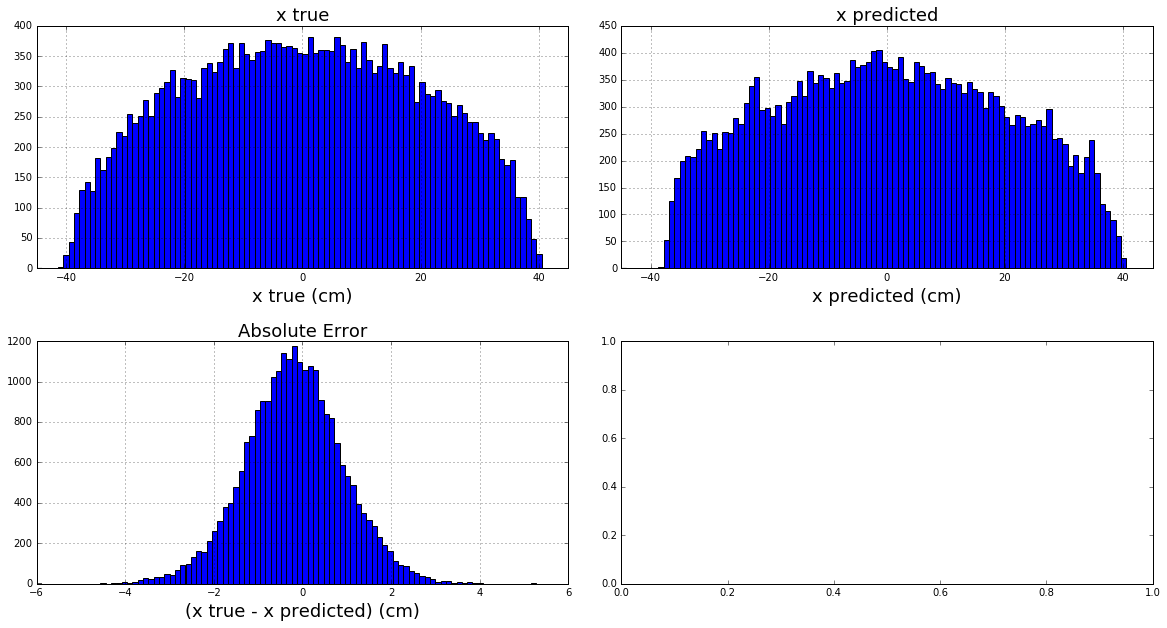

In [27]:

####################################################################################################
####################################################################################################

rows = 2
cols = 2

nbins = 100
x_min = -45
x_max = 45

dx_min = -6
dx_max =  6

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

plt.subplot(rows, cols, 1)
plt.hist(arr_x_true, bins=nbins, range=[x_min, x_max])
plt.xlim([x_min, x_max])
plt.xlabel('x true (cm)', fontsize=18)
plt.title('x true', fontsize=18)
plt.grid(True)

plt.subplot(rows, cols, 2)
plt.hist(arr_x_pred, bins=nbins, range=[x_min, x_max])
plt.xlim([x_min, x_max])
plt.xlabel('x predicted (cm)', fontsize=18)
plt.title('x predicted', fontsize=18)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(arr_dx, bins=nbins, range=[dx_min, dx_max])
plt.xlabel('(x true - x predicted) (cm)', fontsize=18)
plt.title('Absolute Error', fontsize=18)
plt.grid(True)

#plt.subplot(2, 2, 4)
#plt.hist(np.absolute(arr_dx))
#plt.xlabel('(x true - x predicted) (cm)', fontsize=18)
#plt.title('Absolute Value Error', fontsize=18)
#plt.grid(True)

#plt.savefig("plots/xy_errors.png")


In [33]:

print("std : " + str(np.std (arr_dx)) + " cm")
print("mean: " + str(np.mean(arr_dx)) + " cm")



std : 1.11296670867 cm
mean: -0.196396699112 cm


In [28]:

####################################################################################################
# 1) 1k events linear 127-100-100-40-40-20-20-2   STD ~ 19 cm
####################################################################################################

x_err_abs_mean = np.mean(arr_dx)
x_err_abs_max  = np.amax(arr_dx)
x_err_abs_std  = np.std(arr_dx)

y_err_abs_mean = np.mean(arr_dy)
y_err_abs_max  = np.amax(arr_dy)
y_err_abs_std  = np.std(arr_dy)

print()
print("X Error STD (cm): " + str(x_err_abs_std))
print("Y Error STD (cm): " + str(y_err_abs_std))
print()
print("X Error Max (cm): " + str(x_err_abs_max))
print("Y Error Max (cm): " + str(y_err_abs_max))
print()
print("X Error Mean (cm): " + str(x_err_abs_mean) )
print("Y Error Mean (cm): " + str(y_err_abs_mean))
print()




X Error STD (cm): 1.11296670867
Y Error STD (cm): 1.14917619103

X Error Max (cm): 5.75725851994
Y Error Max (cm): 8.01040072255

X Error Mean (cm): -0.196396699112
Y Error Mean (cm): -0.323544923581

